In [1]:
from sklearn.decomposition import PCA
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint
%matplotlib inline
%precision 3

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
plt.style.use('ggplot')

# Problem 1

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional individuals are or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

## Sample of the Salary Dataset

In [2]:
salary_df = pd.read_csv('datasets/SalaryData.csv')
salary_df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


## Checking the types of variables in the dataset.

In [3]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


## Descriptive Statistics of the dataset

In [4]:
salary_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40.0,NaN,NaN,NaN,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


## Checking the counts of individuals in various levels of Education and Occupation

In [5]:
salary_df['Education'] = pd.Categorical(salary_df['Education'])
salary_df['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [6]:
salary_df['Occupation'] = pd.Categorical(salary_df['Occupation'])
salary_df['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

## Distribution of the Salary variable.

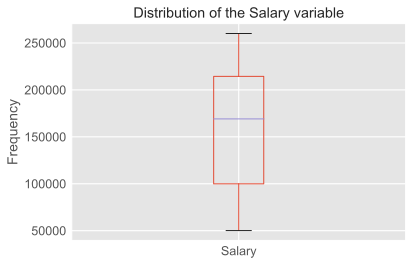

In [7]:
ax = salary_df.boxplot()
ax.set_ylabel("Frequency", size=14)
plt.title("Distribution of the Salary variable");
# plt.savefig('images/Figure1.svg')

## 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

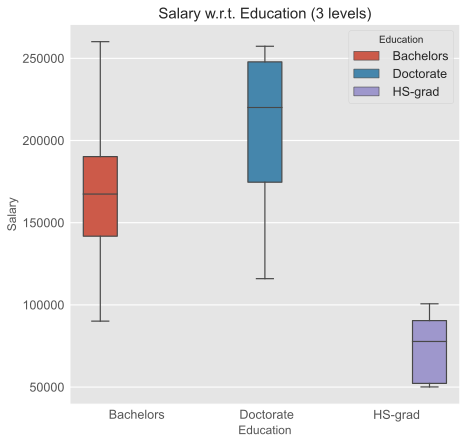

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
a = sns.boxplot(x='Education',
                y='Salary',
                data=salary_df,
                hue='Education',
                ax=ax)
a.set_title("Salary w.r.t. Education (3 levels)", fontsize=15);
# plt.savefig('images/Figure2.svg');

In [9]:
mod = ols('Salary ~ C(Education)', data=salary_df).fit()
aov_tbl = anova_lm(mod, type=1)
aov_tbl

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


## 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

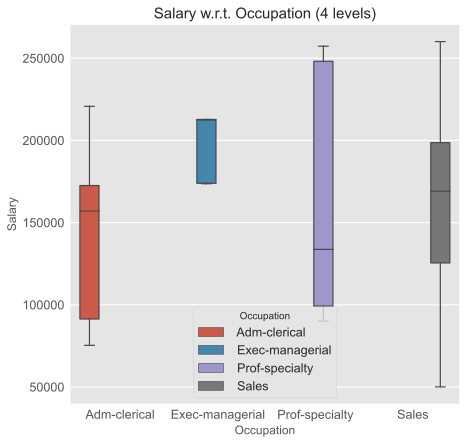

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
a = sns.boxplot(x='Occupation',
                y='Salary',
                data=salary_df,
                hue='Occupation',
                ax=ax)
a.set_title("Salary w.r.t. Occupation (4 levels)", fontsize=15);
# plt.savefig('images/Figure3.svg');

In [11]:
mod = ols('Salary ~ C(Occupation)', data=salary_df).fit()
aov_tbl = anova_lm(mod, type=1)
aov_tbl

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


## 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

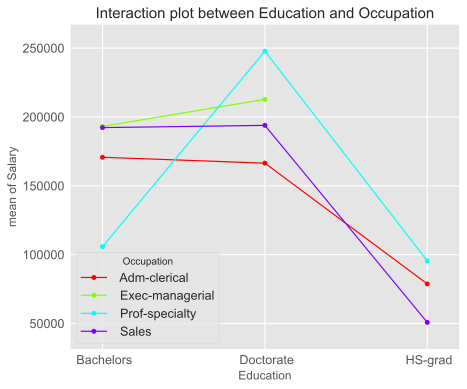

In [12]:
fig, ax = plt.subplots(figsize=(7, 6))
interaction_plot(x=salary_df['Education'].astype('object'),
                 trace=salary_df['Occupation'].astype('object'),
                 response=salary_df['Salary'],
                 ms=10,
                 ax=ax,
                 legendloc=3)
plt.title("Interaction plot between Education and Occupation", fontsize=15);
# plt.savefig('images/Figure4.svg');

## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [13]:
mod = ols('Salary ~ C(Education) + C(Occupation) + C(Education)*C(Occupation)',
          data=salary_df).fit()
aov_tbl = anova_lm(mod, type=2)
aov_tbl

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


In [14]:
total_sum_of_squares = aov_tbl['sum_sq'].sum()
sum_square_edu = aov_tbl.loc['C(Education)', "sum_sq"]
sum_square_occ = aov_tbl.loc['C(Occupation)', "sum_sq"]
sum_square_interaction = aov_tbl.loc['C(Education):C(Occupation)', "sum_sq"]

print(f"Total sum of squares: {total_sum_of_squares:.2f}")
print(
    f"Variance explained by factor Education: {sum_square_edu / total_sum_of_squares * 100:.1f}%"
)
print(
    f"Variance explained by factor Occupation: {sum_square_occ / total_sum_of_squares * 100:.1f}%"
)
print(
    f"Variance explained by interaction effect: {sum_square_interaction / total_sum_of_squares * 100:.1f}%"
)

Total sum of squares: 165185524257.17
Variance explained by factor Education: 62.2%
Variance explained by factor Occupation: 3.3%
Variance explained by interaction effect: 22.0%


# Problem 2

## Sample of the Education Dataset

In [15]:
edu_df = pd.read_csv('datasets/Education - Post 12th Standard.csv')
edu_df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Checking the types of variables in the dataset.

In [16]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

## Descriptive Statistics of the Education Dataset

In [17]:
edu_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [18]:
def univariate_analysis(col):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(x=col, kde=True, ax=axs[0])
    sns.boxplot(x=col, orient='h', ax=axs[1])
    plt.suptitle(f'Distribution of {col.name} variable', size=15);

### Univariate Analysis of Apps variable

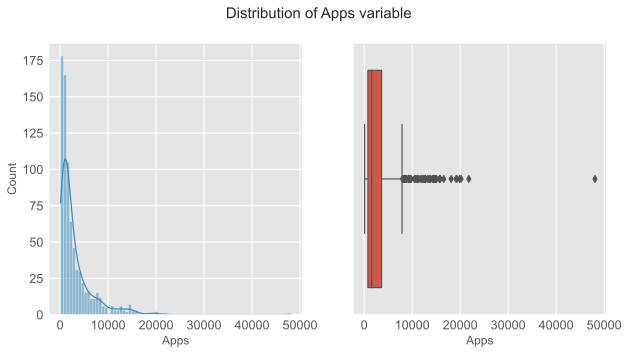

In [19]:
univariate_analysis(edu_df['Apps'])
# plt.savefig('images/Figure5.svg')

### Univariate Analysis of Accept variable

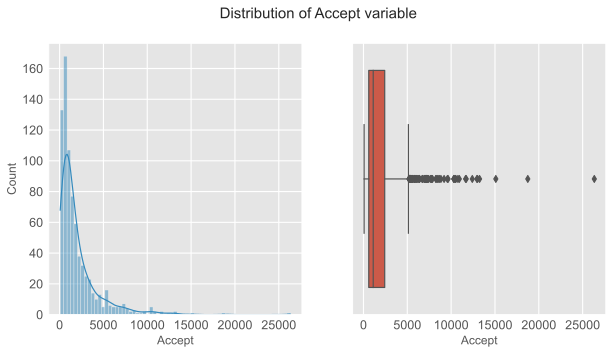

In [20]:
univariate_analysis(edu_df['Accept'])
# plt.savefig('images/Figure6.svg')

### Univariate Analysis of Enroll variable

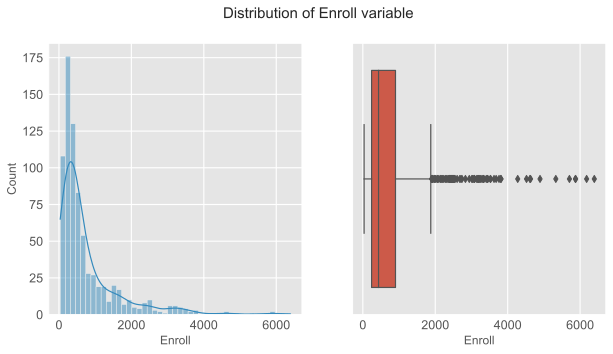

In [21]:
univariate_analysis(edu_df['Enroll'])
# plt.savefig('images/Figure7.svg')

### Univariate Analysis of Top10perc variable

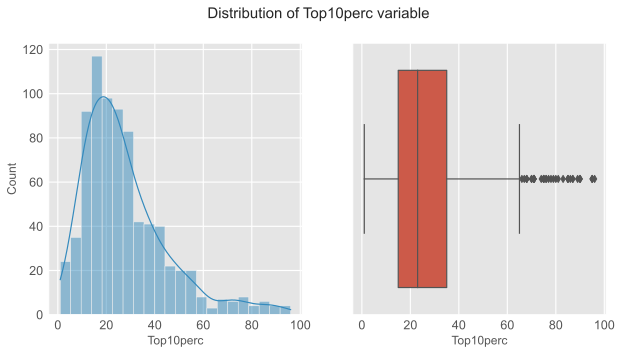

In [22]:
univariate_analysis(edu_df['Top10perc'])
# plt.savefig('images/Figure8.svg')

### Univariate Analysis of Top25perc variable

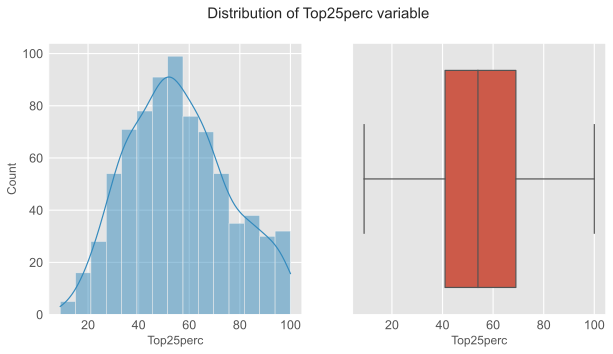

In [23]:
univariate_analysis(edu_df['Top25perc'])
# plt.savefig('images/Figure9.svg')

### Univariate Analysis of F.Undergrad variable

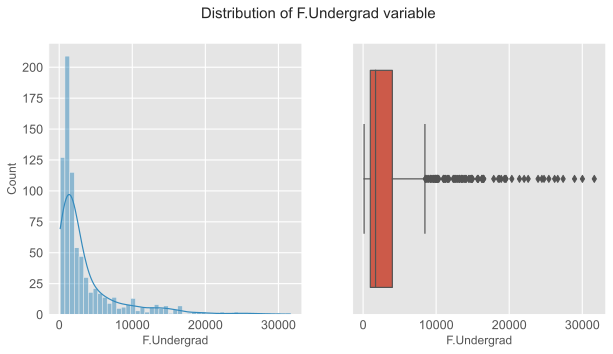

In [24]:
univariate_analysis(edu_df['F.Undergrad'])
# plt.savefig('images/Figure10.svg')

### Univariate Analysis of P.Undergrad variable

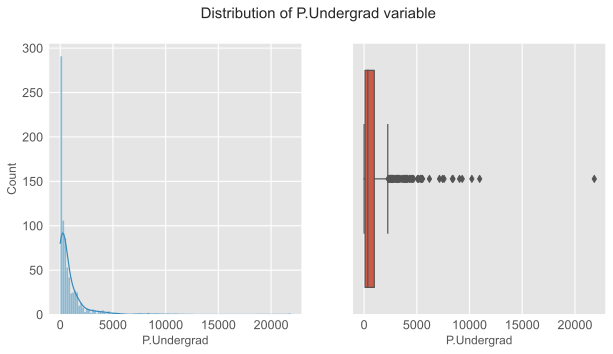

In [25]:
univariate_analysis(edu_df['P.Undergrad'])
# plt.savefig('images/Figure11.svg')

### Univariate Analysis of Outstate variable

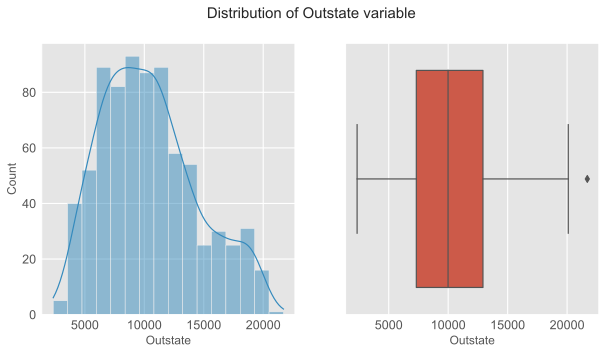

In [26]:
univariate_analysis(edu_df['Outstate'])
# plt.savefig('images/Figure12.svg')

### Univariate Analysis of Room.Board variable

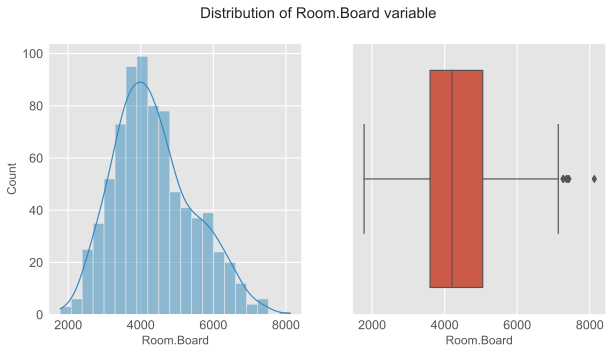

In [27]:
univariate_analysis(edu_df['Room.Board'])
# plt.savefig('images/Figure13.svg')

### Univariate Analysis of Books variable

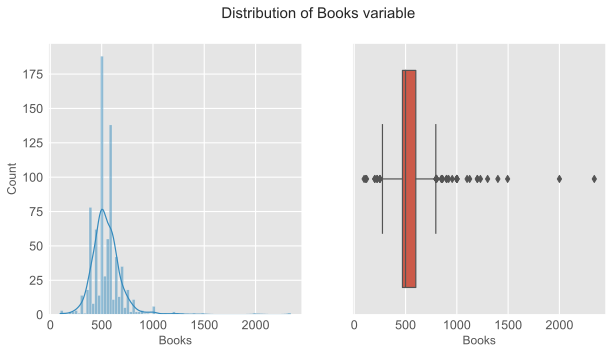

In [28]:
univariate_analysis(edu_df['Books'])
# plt.savefig('images/Figure14.svg')

### Univariate Analysis of Personal variable

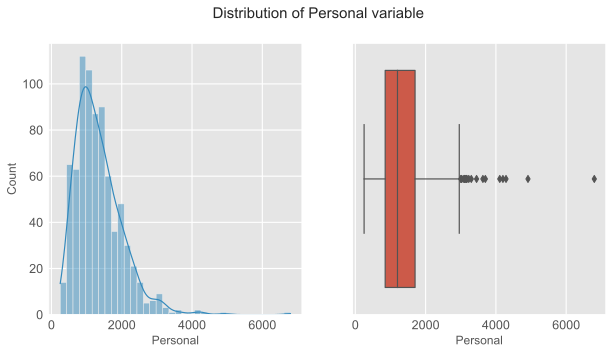

In [29]:
univariate_analysis(edu_df['Personal'])
# plt.savefig('images/Figure15.svg')

### Univariate Analysis of PhD variable

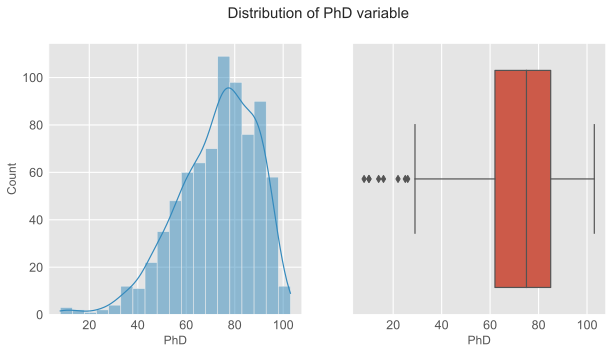

In [30]:
univariate_analysis(edu_df['PhD'])
# plt.savefig('images/Figure16.svg')

### Univariate Analysis of Terminal variable

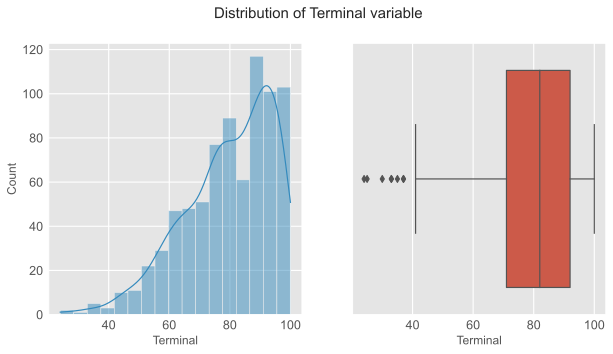

In [31]:
univariate_analysis(edu_df['Terminal'])
# plt.savefig('images/Figure17.svg')

### Univariate Analysis of S.F.Ratio variable

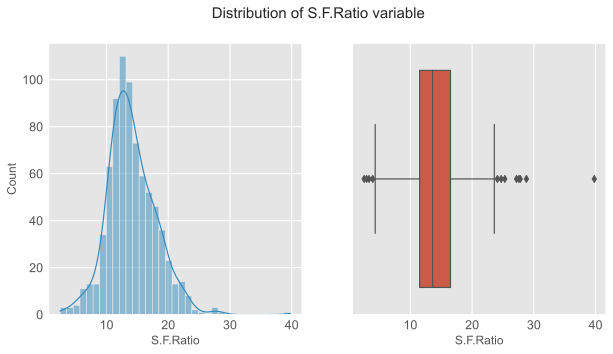

In [32]:
univariate_analysis(edu_df['S.F.Ratio'])
# plt.savefig('images/Figure18.svg')

### Univariate Analysis of perc.alumni variable

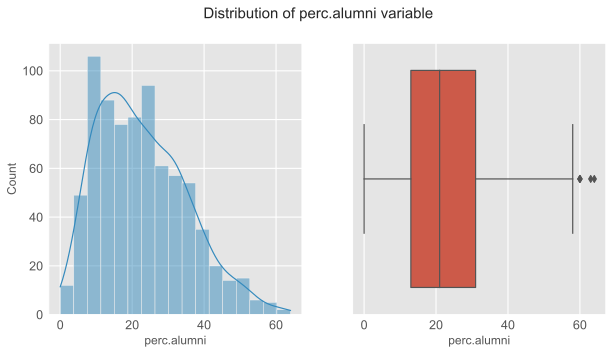

In [33]:
univariate_analysis(edu_df['perc.alumni'])
# plt.savefig('images/Figure19.svg')

### Univariate Analysis of Expend variable

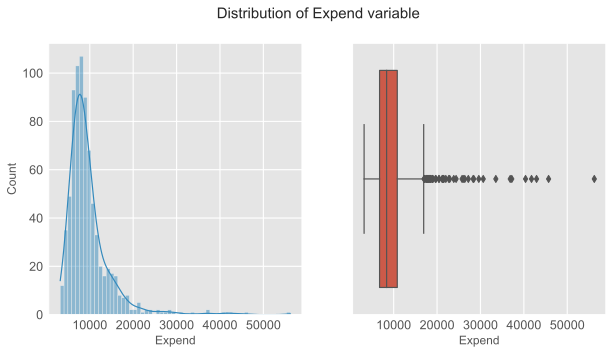

In [34]:
univariate_analysis(edu_df['Expend'])
# plt.savefig('images/Figure20.svg')

### Univariate Analysis of Grad.Rate variable

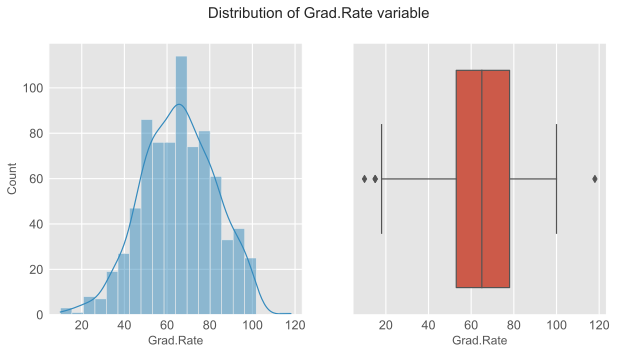

In [35]:
univariate_analysis(edu_df['Grad.Rate'])
# plt.savefig('images/Figure21.svg')

### Multivariate Analysis of Education Dataset

In [36]:
# sns.pairplot(data=edu_df, corner=True)
# plt.suptitle('Multivariate Analysis: Pairplot', size=15);
# # plt.savefig('images/Figure22.svg');

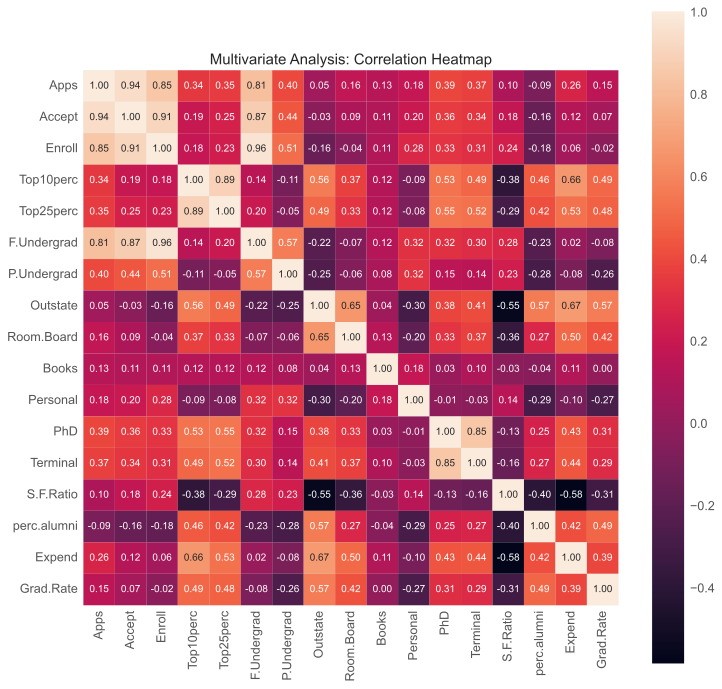

In [37]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data=edu_df.corr(), fmt='.2f', annot=True, square=True, ax=ax)
plt.title('Multivariate Analysis: Correlation Heatmap', size=15);
# plt.savefig('images/Figure22.svg');

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [38]:
edu_num_df = edu_df.select_dtypes(include='number')

In [39]:
edu_scaled_df = edu_num_df.apply(stats.zscore)
round(edu_scaled_df.head(), 3)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.347,-0.321,-0.064,-0.259,-0.192,-0.168,-0.209,-0.746,-0.965,-0.602,1.270,-0.163,-0.116,1.014,-0.868,-0.502,-0.318
1,-0.211,-0.039,-0.289,-0.656,-1.354,-0.210,0.244,0.457,1.909,1.216,0.236,-2.676,-3.378,-0.478,-0.545,0.166,-0.551
2,-0.407,-0.376,-0.478,-0.315,-0.293,-0.550,-0.497,0.201,-0.554,-0.905,-0.260,-1.205,-0.931,-0.301,0.586,-0.177,-0.668
3,-0.668,-0.682,-0.692,1.840,1.678,-0.658,-0.521,0.627,0.997,-0.602,-0.688,1.185,1.176,-1.615,1.151,1.793,-0.377
4,-0.726,-0.765,-0.781,-0.656,-0.596,-0.712,0.009,-0.717,-0.217,1.519,0.236,0.205,-0.524,-0.554,-1.675,0.242,-2.940


## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

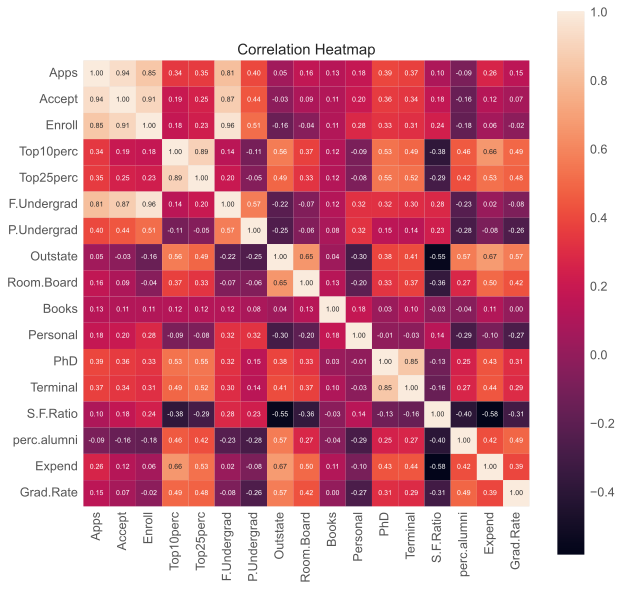

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=edu_scaled_df.corr(),
            fmt='.2f',
            annot=True,
            square=True,
            ax=ax,
            annot_kws={'size': 7})
plt.title('Correlation Heatmap', size=15);
# plt.savefig('images/Figure23.svg');

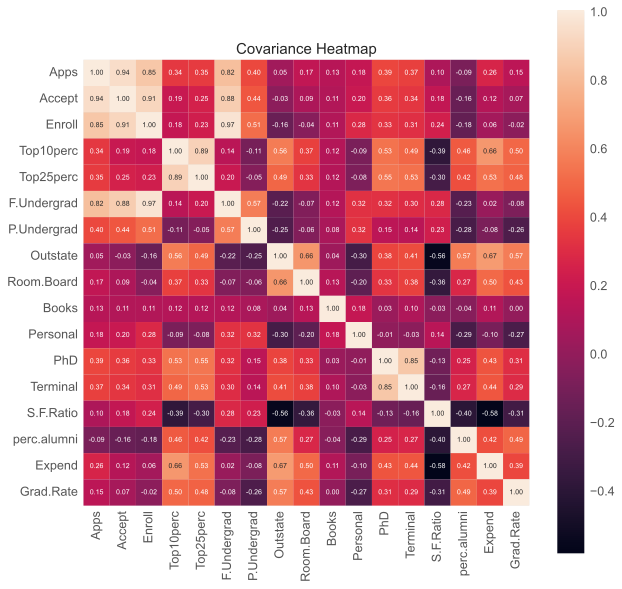

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=edu_scaled_df.cov(),
            fmt='.2f',
            annot=True,
            square=True,
            ax=ax,
            annot_kws={'size': 7})
plt.title('Covariance Heatmap', size=15);
# plt.savefig('images/Figure24.svg');

## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

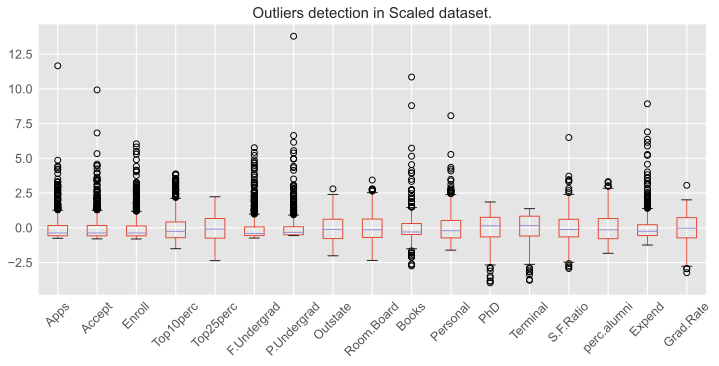

In [42]:
edu_scaled_df.boxplot(figsize=(12, 5), rot=45)
plt.title("Outliers detection in Scaled dataset.", size=15);
# plt.savefig('images/Figure25.svg');

## 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [43]:
pca = PCA(n_components=17, random_state=123)
pca.fit(edu_scaled_df)

PCA(n_components=17, random_state=123)

In [44]:
print(f"Eigenvectors:\n")
print(pca.components_)

Eigenvectors:

[[ 2.488e-01  2.076e-01  1.763e-01  3.543e-01  3.440e-01  1.546e-01
   2.644e-02  2.947e-01  2.490e-01  6.476e-02 -4.253e-02  3.183e-01
   3.171e-01 -1.770e-01  2.051e-01  3.189e-01  2.523e-01]
 [ 3.316e-01  3.721e-01  4.037e-01 -8.241e-02 -4.478e-02  4.177e-01
   3.151e-01 -2.496e-01 -1.378e-01  5.634e-02  2.199e-01  5.831e-02
   4.643e-02  2.467e-01 -2.466e-01 -1.317e-01 -1.692e-01]
 [-6.309e-02 -1.012e-01 -8.299e-02  3.506e-02 -2.415e-02 -6.139e-02
   1.397e-01  4.660e-02  1.490e-01  6.774e-01  4.997e-01 -1.270e-01
  -6.604e-02 -2.898e-01 -1.470e-01  2.267e-01 -2.081e-01]
 [ 2.813e-01  2.678e-01  1.618e-01 -5.155e-02 -1.098e-01  1.004e-01
  -1.586e-01  1.313e-01  1.850e-01  8.709e-02 -2.307e-01 -5.347e-01
  -5.194e-01 -1.612e-01  1.731e-02  7.927e-02  2.691e-01]
 [ 5.741e-03  5.579e-02 -5.569e-02 -3.954e-01 -4.265e-01 -4.345e-02
   3.024e-01  2.225e-01  5.609e-01 -1.273e-01 -2.223e-01  1.402e-01
   2.047e-01 -7.939e-02 -2.163e-01  7.596e-02 -1.093e-01]
 [-1.624e-02  7

In [45]:
print(f"Eigenvalues:\n")
print(pca.explained_variance_)

Eigenvalues:

[5.451 4.484 1.175 1.008 0.934 0.848 0.606 0.588 0.531 0.404 0.313 0.221
 0.168 0.144 0.088 0.037 0.023]


## 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [46]:
round(
    pd.DataFrame(pca.components_,
                 columns=edu_scaled_df.columns,
                 index=[
                     'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
                     'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15',
                     'PC16', 'PC17'
                 ]), 3)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
PC1,0.249,0.208,0.176,0.354,0.344,0.155,0.026,0.295,0.249,0.065,-0.043,0.318,0.317,-0.177,0.205,0.319,0.252
PC2,0.332,0.372,0.404,-0.082,-0.045,0.418,0.315,-0.250,-0.138,0.056,0.220,0.058,0.046,0.247,-0.247,-0.132,-0.169
PC3,-0.063,-0.101,-0.083,0.035,-0.024,-0.061,0.140,0.047,0.149,0.677,0.500,-0.127,-0.066,-0.290,-0.147,0.227,-0.208
PC4,0.281,0.268,0.162,-0.052,-0.110,0.100,-0.159,0.131,0.185,0.087,-0.231,-0.535,-0.519,-0.161,0.017,0.079,0.269
PC5,0.006,0.056,-0.056,-0.395,-0.427,-0.043,0.302,0.223,0.561,-0.127,-0.222,0.140,0.205,-0.079,-0.216,0.076,-0.109
PC6,-0.016,0.008,-0.043,-0.053,0.033,-0.043,-0.191,-0.030,0.163,0.641,-0.331,0.091,0.155,0.487,-0.047,-0.298,0.216
PC7,-0.042,-0.013,-0.028,-0.161,-0.118,-0.025,0.061,0.109,0.210,-0.150,0.634,-0.001,-0.028,0.219,0.243,-0.227,0.560
PC8,-0.103,-0.056,0.059,-0.123,-0.102,0.079,0.571,0.010,-0.221,0.213,-0.233,-0.077,-0.012,-0.084,0.679,-0.054,-0.005
PC9,-0.090,-0.178,-0.129,0.341,0.404,-0.059,0.561,-0.005,0.275,-0.134,-0.094,-0.185,-0.255,0.275,-0.255,-0.049,0.042
PC10,0.053,0.041,0.034,0.064,0.015,0.021,-0.223,0.187,0.298,-0.082,0.136,-0.123,-0.089,0.472,0.423,0.132,-0.590


## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [47]:
pc_comps = [
    'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
    'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'
]
prop_var = np.round(pca.explained_variance_ratio_, 2)
cum_var = np.round(np.cumsum(pca.explained_variance_ratio_), 2)
temp = pd.DataFrame(pc_comps, columns=['PCs'])
temp['Proportion Of Variance'] = prop_var
temp['Cumulative Proportion'] = cum_var
temp

,PCs,Proportion Of Variance,Cumulative Proportion
0,PC1,0.32,0.32
1,PC2,0.26,0.58
2,PC3,0.07,0.65
3,PC4,0.06,0.71
4,PC5,0.05,0.77
5,PC6,0.05,0.82
6,PC7,0.04,0.85
7,PC8,0.03,0.89
8,PC9,0.03,0.92
9,PC10,0.02,0.94


## 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [61]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=9, rotation='varimax', method='principal')
factor_rotation = fa.fit(edu_scaled_df)
fa_components = pd.DataFrame(np.round(fa.loadings_, 2),
                             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'],
                             index=edu_scaled_df.columns)
fa_components['h2'] = np.round(fa.get_communalities(), 2)
fa_components['u2'] = np.round(fa.get_uniquenesses(), 2)
fa_components

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,h2,u2
Apps,0.17,0.93,0.04,0.12,0.12,0.05,0.03,-0.03,0.03,0.93,0.07
Accept,0.04,0.97,0.03,0.13,0.07,-0.02,0.03,-0.03,0.04,0.96,0.04
Enroll,0.07,0.94,0.03,0.13,-0.09,-0.07,0.09,-0.02,0.14,0.95,0.05
Top10perc,0.85,0.14,0.05,0.24,0.15,0.30,-0.03,0.17,-0.06,0.95,0.05
Top25perc,0.87,0.17,0.05,0.28,0.13,0.16,-0.03,0.18,-0.03,0.94,0.06
F.Undergrad,0.07,0.91,0.04,0.14,-0.11,-0.11,0.12,-0.06,0.21,0.94,0.06
P.Undergrad,-0.07,0.40,0.02,0.07,-0.02,-0.11,0.14,-0.11,0.87,0.97,0.03
Outstate,0.26,-0.10,0.00,0.24,0.56,0.49,-0.15,0.32,-0.10,0.83,0.17
Room.Board,0.11,0.01,0.09,0.20,0.86,0.28,-0.10,0.01,0.05,0.89,0.11
Books,0.06,0.08,0.99,0.01,0.06,0.03,0.09,-0.02,0.02,1.00,0.00
